## Домашнее задание
1. Попробуйте обучить нейронную сеть с применением одномерных сверток для предсказания сентимента сообщений с твитера на примере https://www.kaggle.com/datasets/arkhoshghalb/twitter-sentiment-analysis-hatred-speech

2. Опишите, какой результат вы получили? Что помогло вам улучшить ее точность?

In [9]:
max_words = 2000
max_len = 20
num_classes = 1

# Training
epochs = 5
batch_size = 512
print_batch_n = 100

In [10]:
import pandas as pd

In [11]:
df_train = pd.read_csv('/content/train.csv')
df_val = pd.read_csv('/content/test.csv')

In [12]:
df_train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [13]:
df_train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df_train.drop('label', axis = 1)
y = df_train['label']

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=13)

In [17]:
!pip install stop-words pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 4.0 MB/s 
     |████████████████████████████████| 8.2 MB 36.3 MB/s 
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32912 sha256=1e59668aa6dc07cf824f7f5b3744db31851937ffd21ef47d47d2ed91b3608b2b
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=92f6b51ea2b34d91db4009dd8cc8b5e5fffce54f3fe607ffd44c5b36d5c2e1a8
  Stored in directory: /root/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
Successfully built stop-words docopt


In [18]:
from string import punctuation
from stop_words import get_stop_words
from pymorphy2 import MorphAnalyzer
import re

In [20]:
sw = set(get_stop_words("en"))

In [21]:
puncts = set(punctuation)
puncts

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~'}

In [22]:
morpher = MorphAnalyzer()


def preprocess_text(txt):
    txt = str(txt)
    txt = "".join(c for c in txt if c not in puncts)
    txt = txt.lower()
    txt = re.sub("не\s", "не", txt)
    txt = [morpher.parse(word)[0].normal_form for word in txt.split() if word not in sw]
    return " ".join(txt)

In [23]:
X_train['tweet'].iloc[:1].values

array(['what is faith? â\x96¸ + | #hope   #peace #justice #prosperity '],
      dtype=object)

In [24]:
X_train['tweet'].iloc[:1].apply(preprocess_text).values

array(['faith â\x96¸ hope peace justice prosperity'], dtype=object)

In [25]:
from tqdm import tqdm 
tqdm.pandas()

X_train['tweet'] = X_train['tweet'].progress_apply(preprocess_text)
X_val['tweet'] = X_val['tweet'].progress_apply(preprocess_text)

100%|██████████| 3197/3197 [00:00<00:00, 4870.57it/s]


In [26]:
train_corpus = " ".join(X_train["tweet"])
train_corpus = train_corpus.lower()

In [27]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt")

tokens = word_tokenize(train_corpus)
tokens[:5]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['faith', 'â\x96¸', 'hope', 'peace', 'justice']

In [28]:
tokens_filtered = [word for word in tokens if word.isalnum()]

In [29]:
from nltk.probability import FreqDist

dist = FreqDist(tokens_filtered)
tokens_filtered_top = [pair[0] for pair in dist.most_common(max_words-1)]
len(tokens_filtered_top)

1999

In [30]:
tokens_filtered_top[:10]

['user', 'love', 'day', 'happy', 'amp', 'just', 'will', 'u', 'im', 'time']

In [31]:
vocabulary = {v: k for k, v in dict(enumerate(tokens_filtered_top, 1)).items()}
vocabulary

{'user': 1,
 'love': 2,
 'day': 3,
 'happy': 4,
 'amp': 5,
 'just': 6,
 'will': 7,
 'u': 8,
 'im': 9,
 'time': 10,
 'life': 11,
 'like': 12,
 'today': 13,
 'new': 14,
 'now': 15,
 'get': 16,
 'thankful': 17,
 'positive': 18,
 'people': 19,
 'good': 20,
 'bihday': 21,
 'cant': 22,
 'see': 23,
 'one': 24,
 'can': 25,
 'dont': 26,
 'fathers': 27,
 'smile': 28,
 'go': 29,
 'want': 30,
 'take': 31,
 'work': 32,
 'healthy': 33,
 'weekend': 34,
 'got': 35,
 'fun': 36,
 'make': 37,
 'summer': 38,
 'best': 39,
 'family': 40,
 'need': 41,
 'us': 42,
 'bull': 43,
 'way': 44,
 'friday': 45,
 'beautiful': 46,
 '2': 47,
 'great': 48,
 'friends': 49,
 'days': 50,
 'going': 51,
 'first': 52,
 'really': 53,
 'music': 54,
 'wait': 55,
 'morning': 56,
 'know': 57,
 'world': 58,
 'back': 59,
 'fathersday': 60,
 'tomorrow': 61,
 'week': 62,
 'never': 63,
 'sad': 64,
 'orlando': 65,
 'cute': 66,
 'think': 67,
 'feel': 68,
 'blog': 69,
 'happiness': 70,
 'well': 71,
 'model': 72,
 'much': 73,
 'trump': 74,
 

In [32]:
import numpy as np


def text_to_sequence(text, maxlen):
    result = []
    tokens = word_tokenize(text.lower())
    tokens_filtered = [word for word in tokens if word.isalnum()]
    for word in tokens_filtered:
        if word in vocabulary:
            result.append(vocabulary[word])

    padding = [0] * (maxlen-len(result))
    return result[-maxlen:] + padding

In [33]:
%%time
X_train = np.asarray([text_to_sequence(text, max_len) for text in X_train['tweet']])
X_val = np.asarray([text_to_sequence(text, max_len) for text in X_val['tweet']])

CPU times: user 3.26 s, sys: 15.6 ms, total: 3.28 s
Wall time: 3.28 s


In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self, vocab_size=2000, embedding_dim=128, out_channel=128, num_classes=1):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.conv_1 = nn.Conv1d(embedding_dim, out_channel, kernel_size=2)
        self.conv_2 = nn.Conv1d(embedding_dim, out_channel, kernel_size=3)
        self.pool = nn.MaxPool1d(2)
        self.relu = nn.ReLU()
        self.linear_1 = nn.Linear(out_channel, out_channel // 2)
        self.linear_2 = nn.Linear(out_channel // 2, num_classes)
        
    def forward(self, x):        
        output = self.embedding(x) # B, L, E
        #                       B  E  L         
        output = output.permute(0, 2, 1)
        output = self.conv_1(output)
        output = self.relu(output)
        output = self.pool(output)

        output = self.conv_2(output)
        output = self.relu(output)
        output = self.pool(output)
        output = torch.max(output, axis=2).values
        output = self.linear_1(output)
        output = self.relu(output)
        output = self.linear_2(output)
        output = F.sigmoid(output)
        return output

In [38]:
from torch.utils.data import DataLoader, Dataset


class DataWrapper(Dataset):
    def __init__(self, data, target, transform=None):
        self.data = torch.from_numpy(data).long()
        self.target = torch.from_numpy(target).long()
        self.transform = transform
        
    def __getitem__(self, index):
        x = self.data[index]
        y = self.target[index]
        
        if self.transform:
            x = self.transform(x)
            
        return x, y
    
    def __len__(self):
        return len(self.data)

In [39]:
train_dataset = DataWrapper(X_train, y_train.values)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = DataWrapper(X_val, y_val.values)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=True)

In [40]:
model = Net(vocab_size=max_words)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [41]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.BCELoss()

In [42]:
model = model.to(device)
model.train()
th = 0.5

train_loss_history = []
test_loss_history = []


for epoch in range(epochs):  
    running_items, running_right = 0.0, 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        
        # обнуляем градиент
        optimizer.zero_grad()
        outputs = model(inputs)
        
        loss = criterion(outputs, labels.float().view(-1, 1))
        loss.backward()
        optimizer.step()

        # подсчет ошибки на обучении
        loss = loss.item()
        running_items += len(labels)
        # подсчет метрики на обучении
        pred_labels = torch.squeeze((outputs > th).int())
        running_right += (labels == pred_labels).sum()
        
    # выводим статистику о процессе обучения
    model.eval()
    
    print(f'Epoch [{epoch + 1}/{epochs}]. ' \
            f'Step [{i + 1}/{len(train_loader)}]. ' \
            f'Loss: {loss:.3f}. ' \
            f'Acc: {running_right / running_items:.3f}', end='. ')
    running_loss, running_items, running_right = 0.0, 0.0, 0.0
    train_loss_history.append(loss)

        # выводим статистику на тестовых данных
    test_running_right, test_running_total, test_loss = 0.0, 0.0, 0.0
    for j, data in enumerate(val_loader):
        test_labels = data[1].to(device)
        test_outputs = model(data[0].to(device))
        
        # подсчет ошибки на тесте
        test_loss = criterion(test_outputs, test_labels.float().view(-1, 1))
        # подсчет метрики на тесте
        test_running_total += len(data[1])
        pred_test_labels = torch.squeeze((test_outputs > th).int())
        test_running_right += (test_labels == pred_test_labels).sum()
    
    test_loss_history.append(test_loss.item())
    print(f'Test loss: {test_loss:.3f}. Test acc: {test_running_right / test_running_total:.3f}')
    
    model.train()
        
print('Training is finished!')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch [1/5]. Step [57/57]. Loss: 0.247. Acc: 0.916. Test loss: 0.090. Test acc: 0.936
Epoch [2/5]. Step [57/57]. Loss: 0.163. Acc: 0.951. Test loss: 0.084. Test acc: 0.947
Epoch [3/5]. Step [57/57]. Loss: 0.048. Acc: 0.966. Test loss: 0.145. Test acc: 0.941
Epoch [4/5]. Step [57/57]. Loss: 0.081. Acc: 0.975. Test loss: 2.264. Test acc: 0.952
Epoch [5/5]. Step [57/57]. Loss: 0.080. Acc: 0.980. Test loss: 0.008. Test acc: 0.943
Training is finished!


Модель показала хорошие результаты

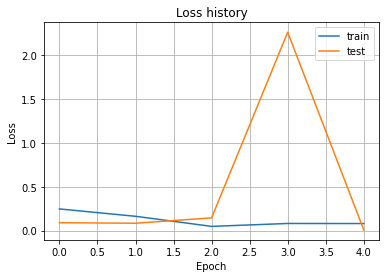

In [44]:
import matplotlib.pyplot as plt

plt.title('Loss history')
plt.grid(True)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(train_loss_history, label='train')
plt.plot(test_loss_history, label='test')
plt.legend();